In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
df_before = pd.read_csv("/content/drive/My Drive/airbnb-recruiting-new-user-bookings/USE_THIS_processed_train_users.csv")

In [4]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Columns: 200 entries, age to tfa_year_2014
dtypes: float64(8), int64(190), object(2)
memory usage: 325.7+ MB


In [0]:
target_count = df_before.country_destination.value_counts()

In [7]:
target_count

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

Class  0 :  124543
Class  1 :  62376
Class  2 :  10094
Class  3 :  5023
Class  4 :  2835
Class  5 :  2324
Class  6 :  2249
Class  7 :  1428
Class  8 :  1061
Class  9 :  762
Class  10 :  539
Class  11 :  217


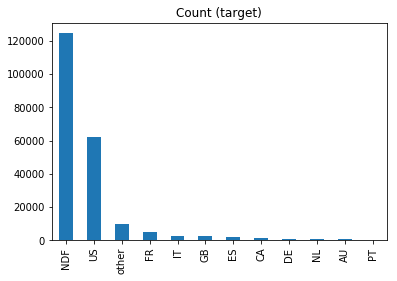

In [8]:
for classnum in range(12):
  print('Class ', classnum, ': ', target_count[classnum])

target_count.plot(kind='bar', title='Count (target)');

## 가장 작은 class PT: 217개, class AU: 539개, class NL: 762개
### 일단 minority class들 좀 다 포함하고자 노력하면.. 각 class마다 개수를 정해놓고 class 내부에서 random subsampling without replacement
#### PT: 217개 전체 subsample
#### AU: 539개 전체 subsample
#### NL: 762개 전체 subsample
#### DE: 1061개 중 1000개 subsample
#### 이 이후 모두 1000개 subsample

In [9]:
df_before.head()

,age,country_destination,id,dac_month,dac_day,tfa_month,tfa_day,tfa_time,dac_pred_diff,tfa_pred_diff,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,dac_weekday_Friday,dac_weekday_Monday,dac_weekday_Saturday,dac_weekday_Sunday,dac_weekday_Thursday,dac_weekday_Tuesday,dac_weekday_Wednesday,dac_season_fall,dac_season_spring,dac_season_summer,dac_season_winter,tfa_season_fall,tfa_season_spring,tfa_season_summer,tfa_season_winter,tfa_weekday_Friday,tfa_weekday_Monday,tfa_weekday_Saturday,tfa_weekday_Sunday,tfa_weekday_Thursday,tfa_weekday_Tuesday,tfa_weekday_Wednesday,tfa_trange_afternoon,tfa_trange_dawn,tfa_trange_evening,tfa_trange_morning,tfa_trange_night,dac_year_2010,dac_year_2011,dac_year_2012,dac_year_2013,dac_year_2014,tfa_year_2009,tfa_year_2010,tfa_year_2011,tfa_year_2012,tfa_year_2013,tfa_year_2014
0,-0.023255,NDF,gxn3p5htnn,-0.006939,1.387946,-0.933846,0.358248,-1.023055,3.222044,4.28441,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.070759,NDF,820tgsjxq7,-0.315897,1.044700,-0.315893,0.815937,0.590574,2.156499,4.28441,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1.763011,US,4ft3gnwmtx,0.919936,1.387946,-0.006916,-0.785974,1.335326,3.222044,4.28441,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,0.446815,other,bjjt8pjhuk,1.846811,-1.243607,1.228989,1.731315,-0.774804,2.156499,4.28441,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.352801,US,87mebub9p4,0.919936,-0.213869,1.846942,-0.900397,-0.774804,3.222044,4.28441,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [0]:
df_ndfs=df_before[df_before['country_destination']=='NDF']
df_uss=df_before[df_before['country_destination']=='US']
df_others=df_before[df_before['country_destination']=='other']
df_frs=df_before[df_before['country_destination']=='FR']
df_its=df_before[df_before['country_destination']=='IT']
df_gbs=df_before[df_before['country_destination']=='GB']
df_ess=df_before[df_before['country_destination']=='ES']
df_cas=df_before[df_before['country_destination']=='CA']
df_des=df_before[df_before['country_destination']=='DE']
df_nls=df_before[df_before['country_destination']=='NL']
df_aus=df_before[df_before['country_destination']=='AU']
df_pts=df_before[df_before['country_destination']=='PT']

In [0]:
df_after = df_ndfs.sample(1000, random_state=1)

In [12]:
df_after.head()

,age,country_destination,id,dac_month,dac_day,tfa_month,tfa_day,tfa_time,dac_pred_diff,tfa_pred_diff,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,dac_weekday_Friday,dac_weekday_Monday,dac_weekday_Saturday,dac_weekday_Sunday,dac_weekday_Thursday,dac_weekday_Tuesday,dac_weekday_Wednesday,dac_season_fall,dac_season_spring,dac_season_summer,dac_season_winter,tfa_season_fall,tfa_season_spring,tfa_season_summer,tfa_season_winter,tfa_weekday_Friday,tfa_weekday_Monday,tfa_weekday_Saturday,tfa_weekday_Sunday,tfa_weekday_Thursday,tfa_weekday_Tuesday,tfa_weekday_Wednesday,tfa_trange_afternoon,tfa_trange_dawn,tfa_trange_evening,tfa_trange_morning,tfa_trange_night,dac_year_2010,dac_year_2011,dac_year_2012,dac_year_2013,dac_year_2014,tfa_year_2009,tfa_year_2010,tfa_year_2011,tfa_year_2012,tfa_year_2013,tfa_year_2014
83711,1.010899,NDF,3cj4ltm11s,-0.006939,-0.328284,-0.006916,-0.328285,0.590574,0.025409,0.024726,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
99650,6.651739,NDF,3fpj01tm00,0.610978,-0.099453,0.611037,-0.099441,0.962950,0.025409,0.024726,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
84860,0.352801,NDF,he5v1fr7ee,-0.006939,0.243793,-0.006916,0.243826,0.962950,0.025409,0.024726,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
135727,-0.023255,NDF,1b7du9gbe0,1.846811,1.273531,1.846942,1.273626,0.838825,0.025409,0.024726,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
156914,-0.023255,NDF,2ir6ol28m3,-1.242773,1.044700,-1.242822,1.044781,1.211201,-1.040136,-1.040195,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [0]:
df_class_us = df_uss.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_us], axis=0)

In [0]:
df_class_others = df_others.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_others], axis=0)

In [0]:
df_class_fr = df_frs.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_fr], axis=0)

In [0]:
df_class_it = df_its.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_it], axis=0)

In [0]:
df_class_gb = df_gbs.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_gb], axis=0)

In [0]:
df_class_es = df_ess.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_es], axis=0)

In [0]:
df_class_ca = df_cas.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_ca], axis=0)

In [0]:
df_class_de = df_des.sample(1000, random_state=1)
df_after = pd.concat([df_after, df_class_de], axis=0)

In [0]:
df_after = pd.concat([df_after, df_nls], axis=0)

In [22]:
df_after.tail()

,age,country_destination,id,dac_month,dac_day,tfa_month,tfa_day,tfa_time,dac_pred_diff,tfa_pred_diff,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,dac_weekday_Friday,dac_weekday_Monday,dac_weekday_Saturday,dac_weekday_Sunday,dac_weekday_Thursday,dac_weekday_Tuesday,dac_weekday_Wednesday,dac_season_fall,dac_season_spring,dac_season_summer,dac_season_winter,tfa_season_fall,tfa_season_spring,tfa_season_summer,tfa_season_winter,tfa_weekday_Friday,tfa_weekday_Monday,tfa_weekday_Saturday,tfa_weekday_Sunday,tfa_weekday_Thursday,tfa_weekday_Tuesday,tfa_weekday_Wednesday,tfa_trange_afternoon,tfa_trange_dawn,tfa_trange_evening,tfa_trange_morning,tfa_trange_night,dac_year_2010,dac_year_2011,dac_year_2012,dac_year_2013,dac_year_2014,tfa_year_2009,tfa_year_2010,tfa_year_2011,tfa_year_2012,tfa_year_2013,tfa_year_2014
213111,-0.963395,NL,n7g1da57kq,-0.006939,1.616777,-0.006916,1.616892,-0.278303,-1.040136,-1.040195,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
213118,-1.245437,NL,zd9fc6m0b7,-0.006939,1.616777,-0.006916,1.616892,-0.030052,-1.040136,-1.040195,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
213128,-1.433465,NL,f6glkfzgtc,-0.006939,1.616777,-0.006916,1.616892,0.094073,-1.040136,-1.040195,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
213351,-0.305297,NL,9yj2xqlard,-0.006939,1.616777,-0.006916,1.616892,1.087075,-1.040136,-1.040195,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
213371,-0.023255,NL,5ljgd6ldv8,-0.006939,1.616777,-0.006916,1.616892,1.087075,-1.040136,-1.040195,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [0]:
df_after = pd.concat([df_after, df_aus], axis=0)

In [0]:
df_after = pd.concat([df_after, df_pts], axis=0)

In [0]:
from sklearn.utils import shuffle

In [0]:
df_new = shuffle(df_after)

In [0]:
df_new.reset_index(drop=True, inplace=True)

In [28]:
df_new

,age,country_destination,id,dac_month,dac_day,tfa_month,tfa_day,tfa_time,dac_pred_diff,tfa_pred_diff,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_-unknown-,language_ca,language_cs,language_da,language_de,...,first_browser_Yandex.Browser,first_browser_wOSBrowser,dac_weekday_Friday,dac_weekday_Monday,dac_weekday_Saturday,dac_weekday_Sunday,dac_weekday_Thursday,dac_weekday_Tuesday,dac_weekday_Wednesday,dac_season_fall,dac_season_spring,dac_season_summer,dac_season_winter,tfa_season_fall,tfa_season_spring,tfa_season_summer,tfa_season_winter,tfa_weekday_Friday,tfa_weekday_Monday,tfa_weekday_Saturday,tfa_weekday_Sunday,tfa_weekday_Thursday,tfa_weekday_Tuesday,tfa_weekday_Wednesday,tfa_trange_afternoon,tfa_trange_dawn,tfa_trange_evening,tfa_trange_morning,tfa_trange_night,dac_year_2010,dac_year_2011,dac_year_2012,dac_year_2013,dac_year_2014,tfa_year_2009,tfa_year_2010,tfa_year_2011,tfa_year_2012,tfa_year_2013,tfa_year_2014
0,6.369697,CA,go0lrp2lft,-0.006939,0.129377,-0.006916,0.129403,1.211201,0.025409,0.024726,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2.515123,NL,cy7z7zlncw,1.228894,-1.243607,1.228989,-1.243663,0.466449,1.090954,1.089647,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,-0.023255,NDF,k9iy8bwocd,-0.315897,0.129377,-0.315893,0.129403,1.087075,-1.040136,-1.040195,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,-0.963395,DE,tgbc7xj7tu,-0.933814,-0.442699,-0.933846,-0.442708,-1.519556,-1.040136,-1.040195,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.023255,ES,k3vdx4h4ur,-0.315897,0.014962,-0.315893,0.014981,0.714700,1.090954,1.089647,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,2.703151,GB,7l8w9mjgyo,0.610978,-0.785945,0.611037,-0.785974,-0.898929,0.025409,0.024726,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,-0.775367,IT,dcmwyg4bk4,-0.315897,1.044700,-0.315893,1.044781,0.466449,-1.040136,-1.040195,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,1.574983,other,yk8ani6ffs,-0.315897,-1.358022,-0.315893,-1.358085,-1.519556,0.025409,0.024726,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
8,0.540829,other,i07vsn6wkm,-0.315897,-1.014776,-0.315893,-1.014819,0.838825,1.090954,1.089647,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
9,-0.681353,ES,gakn0bxr53,0.919936,-0.442699,0.920013,-0.442708,-0.030052,2.156499,2.154568,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
df_new.to_csv("/content/drive/My Drive/airbnb-recruiting-new-user-bookings/USE_THIS_subsample_train_users.csv", index=False)

In [30]:
df_new.shape

(10518, 200)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10518 entries, 0 to 10517
Columns: 200 entries, age to tfa_year_2014
dtypes: float64(8), int64(190), object(2)
memory usage: 16.0+ MB
